In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/전처리 완료/현대_유럽_미국_소매판매실적.csv')

In [4]:
df.head()

,차량 모델,차량 구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,국가명,연도
0,i10 (AC3),승용차,4791,3820,5365,3514,4714,5812,4593,2961,4762,3965,4564,3953,EU,2023
1,i20 (GB),승용차,0,0,0,0,0,0,0,0,0,0,0,0,EU,2023
2,i20 (BC3),승용차,3100,3221,5174,4437,4722,4607,4908,3119,4747,3872,3459,3041,EU,2023
3,i20 N (BC3 N),승용차,202,194,600,360,444,342,298,379,663,592,597,634,EU,2023
4,Elantra,승용차,117,131,108,181,147,237,198,90,40,31,80,30,EU,2023


In [5]:
df_melted =  df.melt(id_vars=['차량 모델', '차량 구분', '국가명', '연도'], 
        value_vars=["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"] ,
        var_name='월', value_name='판매량')

In [6]:
df_melted

,차량 모델,차량 구분,국가명,연도,월,판매량
0,i10 (AC3),승용차,EU,2023,1월,4791
1,i20 (GB),승용차,EU,2023,1월,0
2,i20 (BC3),승용차,EU,2023,1월,3100
3,i20 N (BC3 N),승용차,EU,2023,1월,202
4,Elantra,승용차,EU,2023,1월,117
...,...,...,...,...,...,...
2239,Palisade,레저용 차량,US,2025,12월,0
2240,GV60,레저용 차량,US,2025,12월,0
2241,GV70,레저용 차량,US,2025,12월,0
2242,GV70 EV,레저용 차량,US,2025,12월,0


In [7]:
월_매핑 = {
    "1월": 1, "2월": 2, "3월": 3, "4월": 4, "5월": 5, "6월": 6,
    "7월": 7, "8월": 8, "9월": 9, "10월": 10, "11월": 11, "12월": 12
}

In [8]:
df_melted['월_숫자'] = df_melted['월'].map(월_매핑)

In [9]:
df_melted

,차량 모델,차량 구분,국가명,연도,월,판매량,월_숫자
0,i10 (AC3),승용차,EU,2023,1월,4791,1
1,i20 (GB),승용차,EU,2023,1월,0,1
2,i20 (BC3),승용차,EU,2023,1월,3100,1
3,i20 N (BC3 N),승용차,EU,2023,1월,202,1
4,Elantra,승용차,EU,2023,1월,117,1
...,...,...,...,...,...,...,...
2239,Palisade,레저용 차량,US,2025,12월,0,12
2240,GV60,레저용 차량,US,2025,12월,0,12
2241,GV70,레저용 차량,US,2025,12월,0,12
2242,GV70 EV,레저용 차량,US,2025,12월,0,12


In [10]:
df_melted['날짜'] = pd.to_datetime(df_melted['연도'].astype(str) + df_melted['월_숫자'].astype(str), format='%Y%m')

In [11]:
df_melted

,차량 모델,차량 구분,국가명,연도,월,판매량,월_숫자,날짜
0,i10 (AC3),승용차,EU,2023,1월,4791,1,2023-01-01
1,i20 (GB),승용차,EU,2023,1월,0,1,2023-01-01
2,i20 (BC3),승용차,EU,2023,1월,3100,1,2023-01-01
3,i20 N (BC3 N),승용차,EU,2023,1월,202,1,2023-01-01
4,Elantra,승용차,EU,2023,1월,117,1,2023-01-01
...,...,...,...,...,...,...,...,...
2239,Palisade,레저용 차량,US,2025,12월,0,12,2025-12-01
2240,GV60,레저용 차량,US,2025,12월,0,12,2025-12-01
2241,GV70,레저용 차량,US,2025,12월,0,12,2025-12-01
2242,GV70 EV,레저용 차량,US,2025,12월,0,12,2025-12-01


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import matplotlib.font_manager as fm

# 윈도우 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

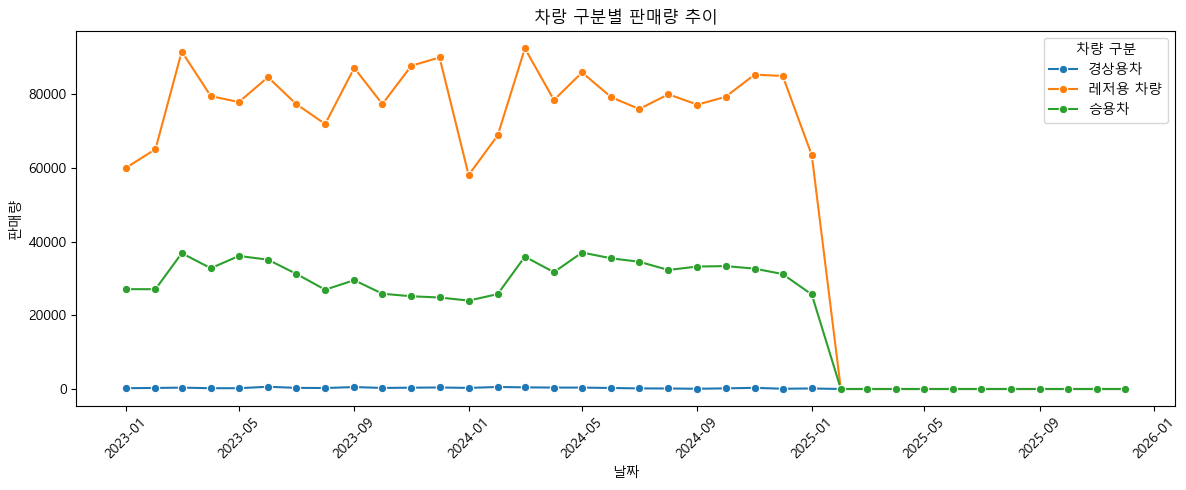

In [16]:

plt.figure(figsize=(12, 5))
df_group1 = df_melted.groupby(["날짜", "차량 구분"])["판매량"].sum().reset_index()
sns.lineplot(data=df_group1, x="날짜", y="판매량", hue="차량 구분", marker="o")
plt.title("차랑 구분별 판매량 추이")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()